In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import subprocess

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD

### Data preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. The dataset contains separate folders for training and test sets.

In [4]:
path = Path.cwd()
data_dir = path / 'data'
print(data_dir)

/home/jovyan/workspace/ml-zoomcamp/2023/homework/08/data


In [5]:
dataset_url = 'https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip'
if not data_dir.exists():
    subprocess.run(['wget', dataset_url])
    subprocess.run(['unzip', 'data.zip'])

(1, 240, 320, 3)


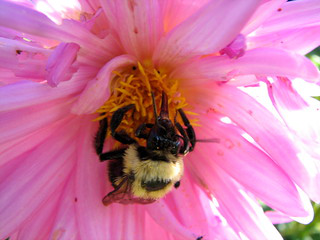

In [6]:
path = data_dir / 'train/bee/'
name = '210144361_aac82685de_n.jpg'
fullname = path / name
img = load_img(fullname)
x = np.array(img)
X = np.array([x])
print(X.shape)
img

In [7]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory('./data/train/',
                                         target_size=(150, 150),
                                         batch_size=32,
                                         class_mode='binary')
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory('./data/test/',
                                       target_size=(150, 150),
                                       batch_size=32,
                                       class_mode='binary',
                                       shuffle=False)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [8]:
print(train_ds.class_indices)
print(test_ds.class_indices)

{'bee': 0, 'wasp': 1}
{'bee': 0, 'wasp': 1}


In [9]:
!pip install scipy

In [10]:
batch_data, batch_labels = train_ds.next()
print(f"Shape of batch_data for batch: {batch_data.shape}")
print(f"Shape of batch_labels for batch: {batch_labels.shape}")

Shape of batch_data for batch: (32, 150, 150, 3)
Shape of batch_labels for batch: (32,)


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer `(Conv2D)`:
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation
* Reduce the size of the feature map with max pooling (`MaxPooling2D`)
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a `Flatten` layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use SGD with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

In [11]:
def make_model(loss,
               input_shape = (150, 150, 3),
               learning_rate=0.002,
               momentum=0.8):
    model = Sequential()
    model.trainable = True
    model.add(Input(shape=input_shape))
    model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer = SGD(learning_rate=learning_rate,
                                  momentum=momentum),
                  loss=loss,
                  metrics = ['accuracy'])
    return model

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `binary crossentropy`
* `categorical crossentropy`
* `mean squared error`
* `cosine similarity`

#### Plots for binary crossentropy loss

In [12]:
model_bc = make_model('binary_crossentropy')

In [13]:
history_bc = model_bc.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
115/115 [==============================] - 11s 79ms/step - loss: 0.6156 - accuracy: 0.6568 - val_loss: 0.5496 - val_accuracy: 0.7397
Epoch 2/10
115/115 [==============================] - 9s 77ms/step - loss: 0.5133 - accuracy: 0.7585 - val_loss: 0.5271 - val_accuracy: 0.7516
Epoch 3/10
115/115 [==============================] - 9s 79ms/step - loss: 0.4736 - accuracy: 0.7786 - val_loss: 0.5072 - val_accuracy: 0.7603
Epoch 4/10
115/115 [==============================] - 9s 78ms/step - loss: 0.4161 - accuracy: 0.8156 - val_loss: 0.4983 - val_accuracy: 0.7669
Epoch 5/10
115/115 [==============================] - 9s 79ms/step - loss: 0.3805 - accuracy: 0.8387 - val_loss: 0.4953 - val_accuracy: 0.7810
Epoch 6/10
115/115 [==============================] - 9s 78ms/step - loss: 0.3358 - accuracy: 0.8635 - val_loss: 0.5106 - val_accuracy: 0.7734
Epoch 7/10
115/115 [==============================] - 9s 78ms/step - loss: 0.2957 - accuracy: 0.8852 - val_loss: 0.5006 - val_accuracy: 0.777

In [14]:
def plot_accuracy(history, epochs, title):
    fig, ax = plt.subplots()
    ax.plot(history.history['accuracy'], label='train')
    ax.plot(history.history['val_accuracy'], label='val')
    ax.set_title(title)
    ax.set_xticks(range(0, epochs), range(1, epochs+1))
    ax.legend()
    plt.grid(linestyle=':')
    plt.show()

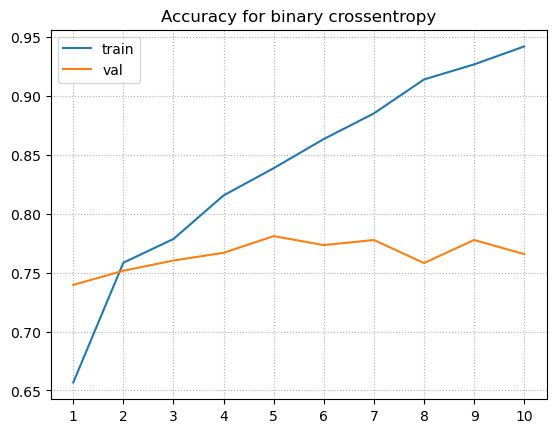

In [15]:
plot_accuracy(history_bc, 10, 'Accuracy for binary crossentropy')

#### Plots for categorical crossentropy loss

In [16]:
model_cc = make_model('categorical_crossentropy')

In [17]:
history_cc = model_cc.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
115/115 [==============================] - 9s 79ms/step - loss: nan - accuracy: 0.5355 - val_loss: nan - val_accuracy: 0.5370
Epoch 2/10
115/115 [==============================] - 9s 78ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 3/10
115/115 [==============================] - 9s 78ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 4/10
115/115 [==============================] - 9s 79ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 5/10
115/115 [==============================] - 9s 77ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 6/10
115/115 [==============================] - 9s 79ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 7/10
115/115 [==============================] - 9s 79ms/step - loss: nan - accuracy: 0.5374 - val_loss: nan - val_accuracy: 0.5370
Epoch 8/10
115/115 [=====================

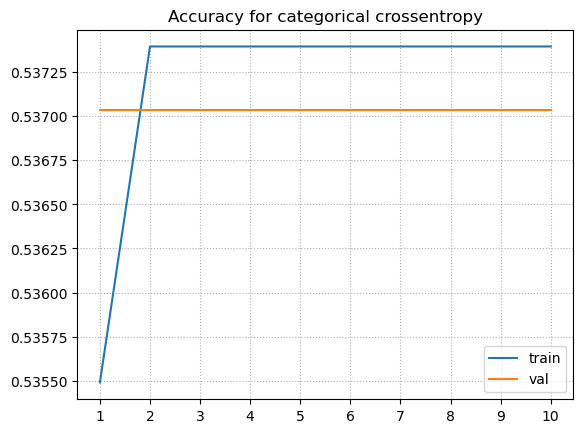

In [18]:
plot_accuracy(history_cc, 10, 'Accuracy for categorical crossentropy')

#### Plots for mean squared error loss

In [19]:
model_mse = make_model('mean_squared_error')

In [20]:
history_mse = model_mse.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
115/115 [==============================] - 9s 78ms/step - loss: 0.2207 - accuracy: 0.6312 - val_loss: 0.1985 - val_accuracy: 0.6819
Epoch 2/10
115/115 [==============================] - 9s 78ms/step - loss: 0.1813 - accuracy: 0.7305 - val_loss: 0.1733 - val_accuracy: 0.7527
Epoch 3/10
115/115 [==============================] - 9s 77ms/step - loss: 0.1583 - accuracy: 0.7803 - val_loss: 0.1685 - val_accuracy: 0.7560
Epoch 4/10
115/115 [==============================] - 9s 78ms/step - loss: 0.1437 - accuracy: 0.8061 - val_loss: 0.1756 - val_accuracy: 0.7429
Epoch 5/10
115/115 [==============================] - 9s 78ms/step - loss: 0.1298 - accuracy: 0.8314 - val_loss: 0.1687 - val_accuracy: 0.7571
Epoch 6/10
115/115 [==============================] - 9s 78ms/step - loss: 0.1173 - accuracy: 0.8518 - val_loss: 0.1596 - val_accuracy: 0.7800
Epoch 7/10
115/115 [==============================] - 9s 78ms/step - loss: 0.1070 - accuracy: 0.8733 - val_loss: 0.1657 - val_accuracy: 0.7745

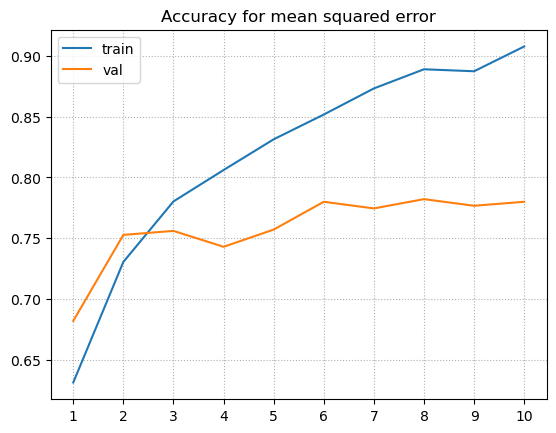

In [21]:
plot_accuracy(history_mse, 10, 'Accuracy for mean squared error')

#### Plots for cosine similarity loss

In [22]:
model_cs = make_model('cosine_similarity')

In [23]:
history_cs = model_cs.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
115/115 [==============================] - 9s 80ms/step - loss: -0.4626 - accuracy: 0.4724 - val_loss: -0.4630 - val_accuracy: 0.4553
Epoch 2/10
115/115 [==============================] - 9s 78ms/step - loss: -0.4626 - accuracy: 0.4724 - val_loss: -0.4630 - val_accuracy: 0.4553
Epoch 3/10
115/115 [==============================] - 9s 78ms/step - loss: -0.4626 - accuracy: 0.4724 - val_loss: -0.4630 - val_accuracy: 0.4553
Epoch 4/10
115/115 [==============================] - 9s 78ms/step - loss: -0.4626 - accuracy: 0.4724 - val_loss: -0.4630 - val_accuracy: 0.4553
Epoch 5/10
115/115 [==============================] - 9s 78ms/step - loss: -0.4626 - accuracy: 0.4724 - val_loss: -0.4630 - val_accuracy: 0.4553
Epoch 6/10
115/115 [==============================] - 9s 79ms/step - loss: -0.4626 - accuracy: 0.4724 - val_loss: -0.4630 - val_accuracy: 0.4553
Epoch 7/10
115/115 [==============================] - 9s 78ms/step - loss: -0.4626 - accuracy: 0.4724 - val_loss: -0.4630 - val_ac

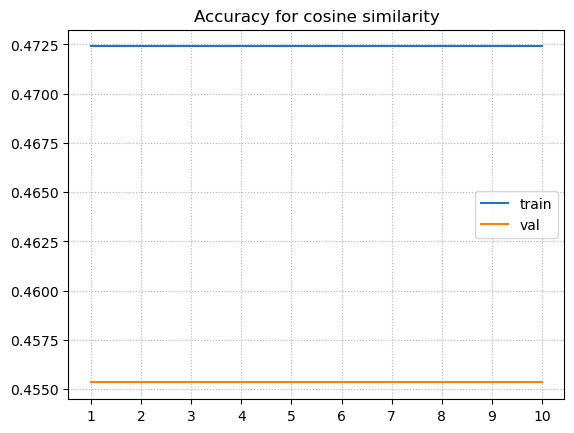

In [24]:
plot_accuracy(history_cs, 10, 'Accuracy for cosine similarity')

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

* 1
* 65
* 896
* 11214912

In [25]:
model_cs.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                11214912  
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

`ImageDataGenerator(rescale=1./255)`

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets.

For training use `.fit()` with the following params:

```
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

### Question 3

What is the median of training accuracy for all the epochs for this model?

* 0.20
* 0.40
* 0.60
* 0.80

In [26]:
train_gen_rs = ImageDataGenerator(rescale=1./255)
train_ds_rs = train_gen_rs.flow_from_directory('./data/train/',
                                         target_size=(150, 150),
                                         batch_size=20,
                                         class_mode='binary',
                                         shuffle=True)
test_gen_rs = ImageDataGenerator(rescale=1./255)
test_ds_rs = test_gen_rs.flow_from_directory('./data/test/',
                                       target_size=(150, 150),
                                       batch_size=20,
                                       class_mode='binary',
                                       shuffle=True)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [27]:
model_bc_rs = make_model('binary_crossentropy')

In [28]:
history_bc_rs = model_bc_rs.fit(train_ds_rs, validation_data=test_ds_rs, epochs=10)

Epoch 1/10
184/184 [==============================] - 9s 48ms/step - loss: 0.6742 - accuracy: 0.5752 - val_loss: 0.6108 - val_accuracy: 0.6765
Epoch 2/10
184/184 [==============================] - 9s 47ms/step - loss: 0.6030 - accuracy: 0.6780 - val_loss: 0.5565 - val_accuracy: 0.7298
Epoch 3/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5537 - accuracy: 0.7294 - val_loss: 0.5473 - val_accuracy: 0.7157
Epoch 4/10
184/184 [==============================] - 9s 47ms/step - loss: 0.5302 - accuracy: 0.7463 - val_loss: 0.5261 - val_accuracy: 0.7582
Epoch 5/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4954 - accuracy: 0.7688 - val_loss: 0.5192 - val_accuracy: 0.7593
Epoch 6/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4685 - accuracy: 0.7933 - val_loss: 0.5210 - val_accuracy: 0.7386
Epoch 7/10
184/184 [==============================] - 9s 47ms/step - loss: 0.4426 - accuracy: 0.8017 - val_loss: 0.5570 - val_accuracy: 0.7266

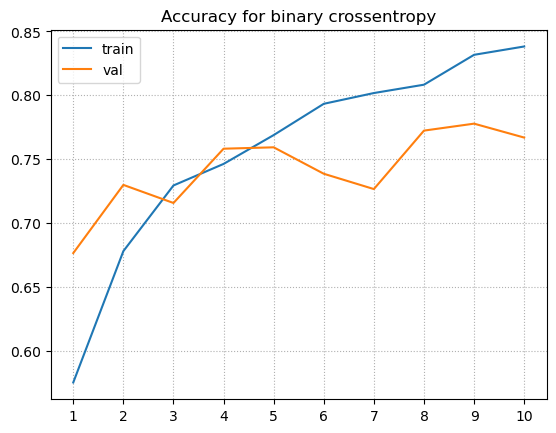

In [29]:
plot_accuracy(history_bc_rs, 10, 'Accuracy for binary crossentropy')

In [30]:
print(f'''Median of the training accuracy: {round(np.median(history_bc_rs.history['accuracy']), 4)}''')

Median of the training accuracy: 0.7811


### Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.031
* 0.061
* 0.091
* 0.131

In [31]:
print(f'''Standard deviation of the training loss: {round(np.std(history_bc_rs.history['loss']), 4)}''')

Standard deviation of the training loss: 0.0878


### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. Add the following augmentations to your training data generator:

* `rotation_range=50`,
* `width_shift_range=0.1`,
* `height_shift_range=0.1`,
* `zoom_range=0.1`,
* `horizontal_flip=True`,
* `fill_mode='nearest'`

### Question 5

Let's train our model for 10 more epochs using the same code as previously.

* Note: make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

* 0.18
* 0.48
* 0.78
* 0.108

In [32]:
train_gen_da = ImageDataGenerator(preprocessing_function=preprocess_input,
                               rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')
train_ds_da = train_gen_da.flow_from_directory('./data/train/',
                                         target_size=(150, 150),
                                         batch_size=20,
                                         class_mode='binary',
                                         shuffle=True)
test_gen_da = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds_da = test_gen_da.flow_from_directory('./data/test/',
                                       target_size=(150, 150),
                                       batch_size=20,
                                       class_mode='binary',
                                       shuffle=True)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


**IMPORTANT**: Using the same `model_bc_rs` model as before.

In [33]:
history_bc_da = model_bc_rs.fit(train_ds_da, validation_data=test_ds_da, epochs=10)

Epoch 1/10
184/184 [==============================] - 24s 129ms/step - loss: 0.5503 - accuracy: 0.7414 - val_loss: 0.4903 - val_accuracy: 0.7593
Epoch 2/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4712 - accuracy: 0.7775 - val_loss: 0.5212 - val_accuracy: 0.7669
Epoch 3/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4618 - accuracy: 0.7887 - val_loss: 0.4792 - val_accuracy: 0.7712
Epoch 4/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4561 - accuracy: 0.7936 - val_loss: 0.4744 - val_accuracy: 0.7843
Epoch 5/10
184/184 [==============================] - 24s 130ms/step - loss: 0.4461 - accuracy: 0.8015 - val_loss: 0.5236 - val_accuracy: 0.7712
Epoch 6/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4475 - accuracy: 0.8031 - val_loss: 0.4477 - val_accuracy: 0.7876
Epoch 7/10
184/184 [==============================] - 24s 129ms/step - loss: 0.4262 - accuracy: 0.8129 - val_loss: 0.4762 - val_ac

In [34]:
print(f'''Mean of the test loss: {round(np.mean(history_bc_da.history['val_loss']), 4)}''')

Mean of the test loss: 0.4818


### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

* 0.38
* 0.58
* 0.78
* 0.98

In [35]:
print(f'''Mean of the test accuracy: {round(np.mean(history_bc_da.history['val_accuracy'][-5:]), 4)}''')

Mean of the test accuracy: 0.7819
